In [3]:
import scipy as sp
from scipy.stats import norm
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pandas.tseries.offsets import MonthEnd
import statsmodels.formula.api as sm
import datetime as dt
import matplotlib.dates as mdates
import math
import sys

## Part One

### Read csv

In [4]:
df = pd.read_csv('/Users/fengyujie/Desktop/ETF Time Series Index Returns.csv',
                 index_col=0,skiprows=6,names=['Dates','IVV','GOVT','IAU','HYG','EEM'],nrows=119)

### Convert the total return factors into monthly total returns

In [5]:
returns = df.pct_change()
returns

,IVV,GOVT,IAU,HYG,EEM
Dates,,,,,
2/29/12,NaN,NaN,NaN,NaN,NaN
3/30/12,0.032905,-0.007655,-0.012743,-0.009517,-0.031243
4/30/12,-0.006586,0.012923,-0.002459,0.011374,-0.016998
5/31/12,-0.060094,0.019961,-0.062847,-0.032215,-0.106953
6/29/12,0.042029,-0.005168,0.023011,0.046626,0.050971
...,...,...,...,...,...
8/31/21,0.030222,-0.001015,-0.000868,0.006094,0.015698
9/30/21,-0.046844,-0.010709,-0.032436,-0.003703,-0.038734
10/29/21,0.070029,-0.000722,0.015564,-0.003110,0.010718


### Create time series index

In [6]:
df.head()
df.dtypes

IVV     float64
GOVT    float64
IAU     float64
HYG     float64
EEM     float64
dtype: object

In [7]:
df['index'] = range(1, len(df) + 1)
df.set_index('index',inplace=True)
df.head()

,IVV,GOVT,IAU,HYG,EEM
index,,,,,
1,137.3200,24.8200,32.96,92.6425,44.3300
2,141.8385,24.6300,32.54,91.7608,42.9450
3,140.9044,24.9483,32.46,92.8045,42.2150
4,132.4369,25.4463,30.42,89.8148,37.7000
5,138.0031,25.3148,31.12,94.0025,39.6216


### Plot ETFs

<function matplotlib.pyplot.show(close=None, block=None)>

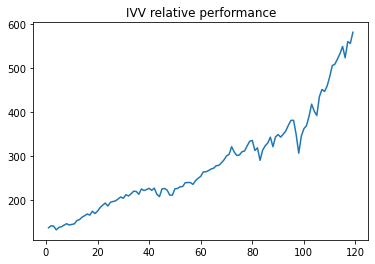

In [8]:
x = df.index
y = df.IVV
plt.plot(x,y)
plt.title('IVV relative performance')
plt.show

    For IVV, the relative performance is upward in general. Comparing with other ETFs, IVV is relatively stable increasing. However, around 2020, there is a dramatic downward trend. Then, after that period, the return gradually increase. 

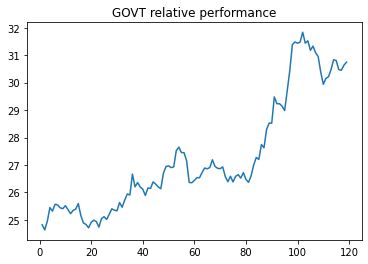

In [9]:
x = df.index
y = df.GOVT
plt.plot(x,y)
plt.title('GOVT relative performance')
plt.show()


    GOVT has upward trend in general, but it also fluctuates wildly than IVV. Through 2018 to 2020, there is a hugh increasing trend in GOVT, but it also follows by a large decreasing trend in return.

<function matplotlib.pyplot.show(close=None, block=None)>

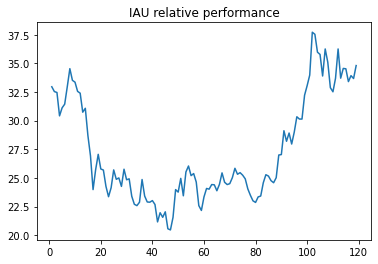

In [10]:
x = df.index
y = df.IAU
plt.plot(x,y)
plt.title('IAU relative performance')
plt.show

    In the beginning, the performance of IAU is higher than other ETFs. However, after the great performance from the first year, a huge decrease in return. The return continues to weaken until mid-2020. The performance of the last two years is better than before, and maintain the strong performance. 

<function matplotlib.pyplot.show(close=None, block=None)>

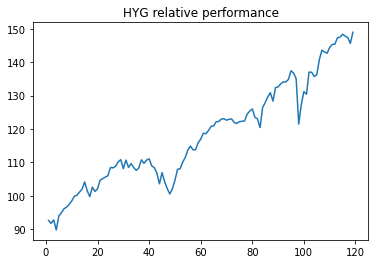

In [11]:
x = df.index
y = df.HYG
plt.plot(x,y)
plt.title('HYG relative performance')
plt.show

    HYG's relative performance is similar of IVV's relative performance. In general, the return of HYG is increasing. However, there is a wild fluctuation during 2015 and 2020. The fluctuation is not as wild as GOVT and IAU, but is higher than IVV. 

<function matplotlib.pyplot.show(close=None, block=None)>

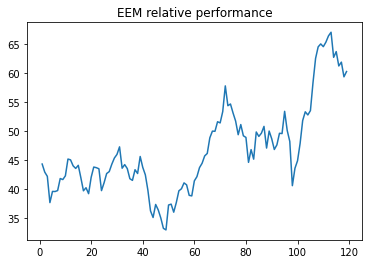

In [12]:
x = df.index
y = df.EEM
plt.plot(x,y)
plt.title('EEM relative performance')
plt.show

    In general, the total return index is upward trend. But, it shows several huge increasing trend during this period, which means EEM breakthrough the gloom and achieve higher return. 

### Compute the covariance matrix and correlation matrix of returns

In [13]:
corr = df.corr()
print(corr)

           IVV      GOVT       IAU       HYG       EEM
IVV   1.000000  0.871610  0.464877  0.970844  0.851110
GOVT  0.871610  1.000000  0.606628  0.867039  0.649418
IAU   0.464877  0.606628  1.000000  0.409543  0.561958
HYG   0.970844  0.867039  0.409543  1.000000  0.843135
EEM   0.851110  0.649418  0.561958  0.843135  1.000000


In [14]:
cov = df.cov()
print(cov)
annual_cov = 12*cov

               IVV        GOVT         IAU          HYG         EEM
IVV   11948.779169  198.264446  231.205208  1647.275818  724.449124
GOVT    198.264446    4.330341    5.743563    28.006227   10.523143
IAU     231.205208    5.743563   20.701184    28.923586   19.909581
HYG    1647.275818   28.006227   28.923586   240.940747  101.908991
EEM     724.449124   10.523143   19.909581   101.908991   60.634631


    Correlation and covariance are statistical tools that measure the relationship between two variables. From covariance, we can see all assest classes are moving in the same direction, which means that one asset has positive return, the other also has the positive return. From the correlation, we can know how strongly one assest moves with the other assest. We can see that IVV has the strongest positive relationship with HYG. It is true, because we can see from the graph, HYG and IVV have similiar growth path. 
    
    IVV and GOVT have a high correlation coefficient; however, the covariance is not as high as IVV to other asset. 
    
    IVV has the highest variance, and GOVT has the lowest variance.

### Compute the annualized standard deviations

### var = np.diagonal(cov)
volatility = np.sqrt(var)
annual_volatility = math.sqrt(12) * volatility
print(annual_volatility)

    IVV has the highest risk, GOVT has the lowest risk.

## Part two


### Compute the Global Minimum Variance Portfolio (GMVP)

In [16]:
inverse_cov = np.linalg.pinv(annual_cov) #inverse the annual covariance
numerator = np.matmul(np.ones(5), inverse_cov)
denominator = np.matmul(np.ones(5), np.matmul(inverse_cov,np.ones(5)))
w_gmvp = numerator/denominator
#weights[weights < 0] = 0
#weights = weights/(weights.sum())  #make sure sum of weights is equal to one
print(w_gmvp)

[-0.01301642  1.10739238 -0.19793947 -0.1006474   0.20421091]


In [17]:
sum_of_weights = w_gmvp.sum()
print(sum_of_weights)

0.9999999999999998


In [18]:
variance_gmvp = 1/denominator #calculate the variance of the return on the GMVP
sd_gmvp = np.sqrt(variance_gmvp)# calculate the standard deviation 
print('Variance of GMVP is: '+str(variance_gmvp))
print('Standard deviation of GMVP is: ' + str(sd_gmvp))

Variance of GMVP is: 4.896033312165007
Standard deviation of GMVP is: 2.2126981972616617


1. Sum of weights is equal to one.
2. GOVT has the greatest weight, it is intuitive, because the risk of GOVT is the smallest.
3. Only holding the asset with the lowest risk will result in lower return than holding a portfolio.
4. Variance is 4.896033312165007, standard deviation is 2.2126981972616617.

### Compute a Minimum Variance Portfolio (MVP)

In [19]:
R = np.array([0.06, 0.016, 0.03, 0.032, 0.071])
print(R)

[0.06  0.016 0.03  0.032 0.071]


In [26]:
A = np.sum(R*np.matmul(R, inverse_cov))
                             
B = np.sum(R*np.matmul(inverse_cov, np.ones(5)))

C = np.sum(np.ones(5)*np.matmul(inverse_cov, np.ones(5)))

D = A*C-pow(B,2)

lamda1 = (C*0.05-B)/D

lamda2 = (A-(B*0.05))/D


print('A: ' + str(A) + ',\nB: ' + str(B) + ',\nC: ' + str(C) + ',\nD: ' + str(D) + ',\n\u03BB1: ' 
      + str(lamda1) + ',\n\u03BB2: ' +str(lamda2))


A: 0.00011286192901352273,
B: 0.004550084838040274,
C: 0.20424697632578076,
D: 2.3484357099429434e-06,
λ1: 2411.078980904414,
λ2: -48.81645786729936


In [21]:
#check weights:
w_mvp = lamda1 * np.matmul(inverse_cov, R)+ lamda2*np.matmul(inverse_cov, np.ones(5))
print(w_mvp)
print(sum(w_mvp))

[-0.03590571  0.65142447 -0.25341843 -0.10367249  0.74157217]
0.9999999999999879


In [22]:
variance_mvp = (A - 2*B*0.05 + C*pow(0.05,2))/D
sd_mvp = np.sqrt(variance_mvp)
print('variance of mvp is: ' + str(variance_mvp))
print('standard deviation of mvp is: ' + str(sd_mvp))

variance of mvp is: 71.73749117792134
standard deviation of mvp is: 8.469798768443164


    1. A: 0.00011286192901352273, 
       B: 0.004550084838040274,   
       C: 0.20424697632578076,
       D: 2.3484357099429434e-06,
       λ1: 2411.078980904414,
       λ2: -48.81645786729936
    
    2. weight sums to 0.9999999999999879
    
    3. variance of mvp is: 71.73749117792134
       standard deviation of mvp is: 8.469798768443164
       
    4. GMVP does not have leverage constraint. GMVP is the MVP with the minimum risk and minimum expected return.

### “Mutual Fund” Theorem

In [30]:
numerator1 = np.matmul(inverse_cov, R)
constant1= numerator1/B

numerator2 = lamda1*B*constant1
denominator2 = lamda2*C*w_gmvp

w_mutualfund =numerator2+denominator2
w_mutualfund

array([-0.03590571,  0.65142447, -0.25341843, -0.10367249,  0.74157217])

    The weights are [-0.03590571,  0.65142447, -0.25341843, -0.10367249,  0.74157217], which are exactly the same as weights of mvp.
    From this result, we can see that all portfolios on the minimum variance frontier can be expressed as a linear combination of the GMVP and another riskier portfolio. 

### Compute the Maximum Sharpe Ratio Portfolio (MSRP)

In [42]:
c = R-0.005*np.ones(5)
E = np.matmul(np.matmul(c, inverse_cov),c)  #sharpe ratio
lamda_msrp = 0.045/E

w_msrp = lamda_msrp*np.matmul(inverse_cov, c)
w_msrp

array([-0.03441811,  2.30920649, -0.44803535, -0.22132881,  0.58588616])

In [45]:
variance_msrp = pow(lamda_msrp, 2)*E
sd_msrp = np.sqrt(variance_msrp)
print('Variance of MSRP is: ' + str(variance_msrp) + '\nStandard deviation of MSRP is: ' + str(sd_msrp))

Variance of MSRP is: 27.94365536333504
Standard deviation of MSRP is: 5.286175873288274


In [53]:
R_msrp = np.sqrt(E)*sd_msrp + 0.005
R_msrp #calculate if the total expected return is equal to mvp's
R_mvp = np.matmul(R, w_mvp)
R_mvp
print('Total expected return of MSRP is: ' + str(R_msrp) + '\nTotal expected return of MVP is:' + str(R_mvp))

Total expected return of MSRP is: 0.05
Total expected return of MVP is:0.04999999999999997


    1. Weights_MSRP = [-0.03441811,  2.30920649, -0.44803535, -0.22132881,  0.58588616]

    2. Comparing with weights of mvp, we can see that the weights of MSRP are greater and the sum of weights_MSRP is greater than one. 
    The maximum sharpe ratio portfolio only contains risky assets. Conservative investors should hold more "cash", while aggressive investors may even borrow cash to increase their return. But, most importantly, both groups should hold long position in the risky portfolio and neither group should alter its composition. 
    
    3. Variance of MSRP is: 27.94365536333504
      Standard deviation of MSRP is: 5.286175873288274     
      
    4. The total expected return of MSRP and MVP is equal   
    
    5. The standard deviation of MVP is larger than the standard deviation of MSRP, so MSRP is more efficient.